In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
%%html
<style>
.rendered_html p {
    font-size: 14px;
    font-family: Ubuntu Mono;
    text-align:justify}
</style>


- Identify genres or classifications that consistently receive high ratings and popularity. This information can guide decisions on which types of movies to invest in or produce more of.
Timing and Release Strategies:

- Analyze if there are specific times of the year or years when movies tend to perform better in terms of ratings and popularity. This can inform decisions on optimal release dates or seasons for new movie releases.

In [3]:
df = pd.read_csv('Top_100_IMDB_Movies.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           100 non-null    object 
 1   description     100 non-null    object 
 2   release_year    100 non-null    int64  
 3   duration        100 non-null    object 
 4   classification  100 non-null    object 
 5   rating          100 non-null    float64
 6   metascore       86 non-null     float64
 7   votes_count     100 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.4+ KB


In [5]:
df.head()

,title,description,release_year,duration,classification,rating,metascore,votes_count
0,1. The Shawshank Redemption,"Over the course of several years, two convicts...",1994,2h 22m,15,8.3,82.0,2.9M
1,2. The Godfather,"Don Vito Corleone, head of a mafia family, dec...",1972,2h 55m,15,8.3,100.0,2M
2,3. The Dark Knight,When the menace known as the Joker wreaks havo...,2008,2h 32m,12A,8.3,84.0,2.9M
3,4. Schindler's List,"In German-occupied Poland during World War II,...",1993,3h 15m,15,8.3,95.0,1.5M
4,5. The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003,3h 21m,12A,8.3,94.0,2M


## Part 1: Cleaning data

> **Clean column title**

In [6]:
df['title'].head()

0                         1. The Shawshank Redemption
1                                    2. The Godfather
2                                  3. The Dark Knight
3                                 4. Schindler's List
4    5. The Lord of the Rings: The Return of the King
Name: title, dtype: object

In [7]:
new = df['title'].str.split(" ", n = 1, expand = True)

In [8]:
df['title'] = new[1]

In [9]:
df['title']

0                          The Shawshank Redemption
1                                     The Godfather
2                                   The Dark Knight
3                                  Schindler's List
4     The Lord of the Rings: The Return of the King
                          ...                      
95                                  American Beauty
96                                Good Will Hunting
97                                             Heat
98                               A Clockwork Orange
99                                        Incendies
Name: title, Length: 100, dtype: object

> **Convert 'watch_time' column to minute**

In [10]:
def convert_to_hour(time):
    time = time.split(' ')
    hour = int(time[0].split('h')[0].strip())
    if len(time) == 2:
        minute = int(time[1].split('m')[0].strip())
        return hour*60 + minute
    else:
        return hour*60
    

In [11]:
df['duration'] = df['duration'].apply(convert_to_hour)

> **Convert votes_count to K**

In [12]:
df['votes_count']

0     2.9M
1       2M
2     2.9M
3     1.5M
4       2M
      ... 
95    1.2M
96    1.1M
97    725K
98    886K
99    205K
Name: votes_count, Length: 100, dtype: object

In [13]:
def convert_to_K(votes):
    if 'M' in votes:
        return float(votes.replace('M', '')) * 1000
    else:
        return float(votes.replace('K', ''))

In [14]:
df['votes_count(K)'] = df['votes_count'].apply(convert_to_K)

In [15]:
df.drop(columns=['votes_count'], inplace=True)

In [16]:
df.head()

,title,description,release_year,duration,classification,rating,metascore,votes_count(K)
0,The Shawshank Redemption,"Over the course of several years, two convicts...",1994,142,15,8.3,82.0,2900.0
1,The Godfather,"Don Vito Corleone, head of a mafia family, dec...",1972,175,15,8.3,100.0,2000.0
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008,152,12A,8.3,84.0,2900.0
3,Schindler's List,"In German-occupied Poland during World War II,...",1993,195,15,8.3,95.0,1500.0
4,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003,201,12A,8.3,94.0,2000.0


In [17]:
df.isna().sum()

title              0
description        0
release_year       0
duration           0
classification     0
rating             0
metascore         14
votes_count(K)     0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

Data does not have duplicated value, and metascores can be null so no need to remove 

## Part 2: Analysis 

In [19]:
df.head()

,title,description,release_year,duration,classification,rating,metascore,votes_count(K)
0,The Shawshank Redemption,"Over the course of several years, two convicts...",1994,142,15,8.3,82.0,2900.0
1,The Godfather,"Don Vito Corleone, head of a mafia family, dec...",1972,175,15,8.3,100.0,2000.0
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008,152,12A,8.3,84.0,2900.0
3,Schindler's List,"In German-occupied Poland during World War II,...",1993,195,15,8.3,95.0,1500.0
4,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003,201,12A,8.3,94.0,2000.0


> **How many movies were released each year?**

In [20]:
movies_per_year = df['release_year'].value_counts().sort_index()

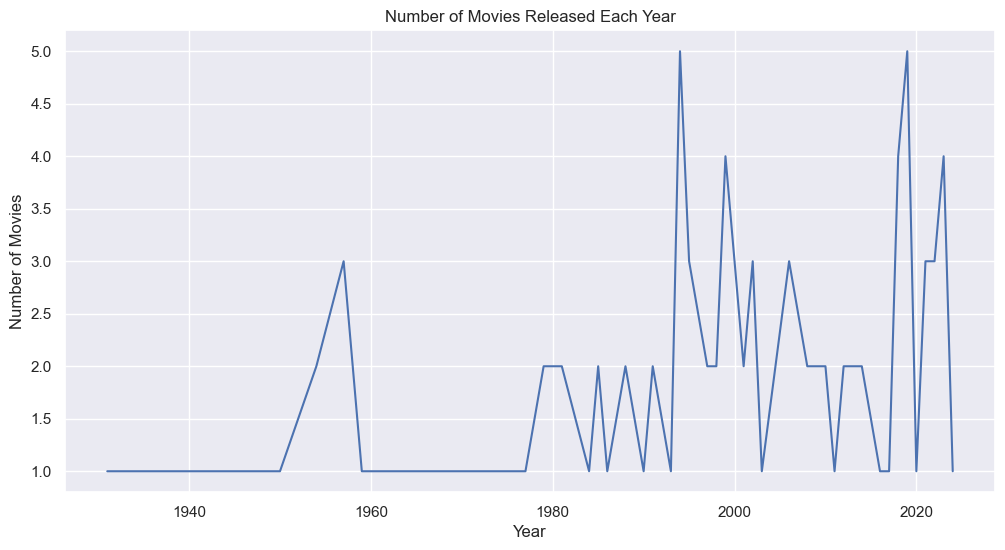

In [21]:
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)   

plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [22]:
years_with_max_count = movies_per_year[movies_per_year == movies_per_year.max()].index.tolist()
years_with_max_count

[1994, 2019]

In [23]:
movies_1994_2019 = df[(df['release_year'] == 1994) | (df['release_year'] == 2019)]

In [24]:
movies_1994_2019

,title,description,release_year,duration,classification,rating,metascore,votes_count(K)
0,The Shawshank Redemption,"Over the course of several years, two convicts...",1994,142,15,8.3,82.0,2900.0
8,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...",1994,154,18,8.3,95.0,2200.0
10,Forrest Gump,The history of the United States from the 1950...,1994,142,12,8.3,82.0,2300.0
41,Parasite,Greed and class discrimination threaten the ne...,2019,132,15,8.3,97.0,976.0
45,Leon,12-year-old Mathilda is reluctantly taken in b...,1994,110,18,8.3,64.0,1300.0
47,The Lion King,Lion prince Simba and his father are targeted ...,1994,88,U,8.3,88.0,1200.0
64,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,181,12A,8.3,78.0,1300.0
65,Joker,"Arthur Fleck, a party clown and a failed stand...",2019,122,15,8.3,59.0,1500.0
89,Kaithi,"Dilli, an ex-convict, endeavours to meet his d...",2019,145,12A,8.3,NaN,43.0
90,Asuran,The teenage son of a farmer from an underprivi...,2019,141,12A,8.3,NaN,34.0


**The years 1994 and 2019 stand out for having a high number of movies in the top 100, each producing several critically acclaimed and popular films.**

<ol>

<li>For 1994: This year saw the release of numerous iconic films included in the data. Notably, <i>The Shawshank Redemption</i>, often considered one of the greatest films of all time, was nominated for 7 Academy Awards. <i>Pulp Fiction</i>, known for revolutionizing narrative structure in films, won Best Original Screenplay at the Academy Awards and the Palme d'Or at the Cannes Film Festival. Additionally, <i>Forrest Gump</i> won 6 Academy Awards, including Best Picture, and <i>The Lion King</i>, one of Disney's most successful animated films, won 2 Academy Awards and 3 Golden Globe Awards.</li>

<li>For 2019: This year also produced several notable films. <i>Parasite</i> became the first non-English language film to win Best Picture. <i>Avengers: Endgame</i> was the second highest-grossing film of all time (until recently). <i>Joker</i> generated significant discussion on mental health and society, winning Best Actor and Best Original Score at the Academy Awards.</li>
</ol>

<b> <p> - Which movie has the highest number of votes? </p>
 <p>- Is there a correlation between the number of votes and the movie rating?</p> </b>

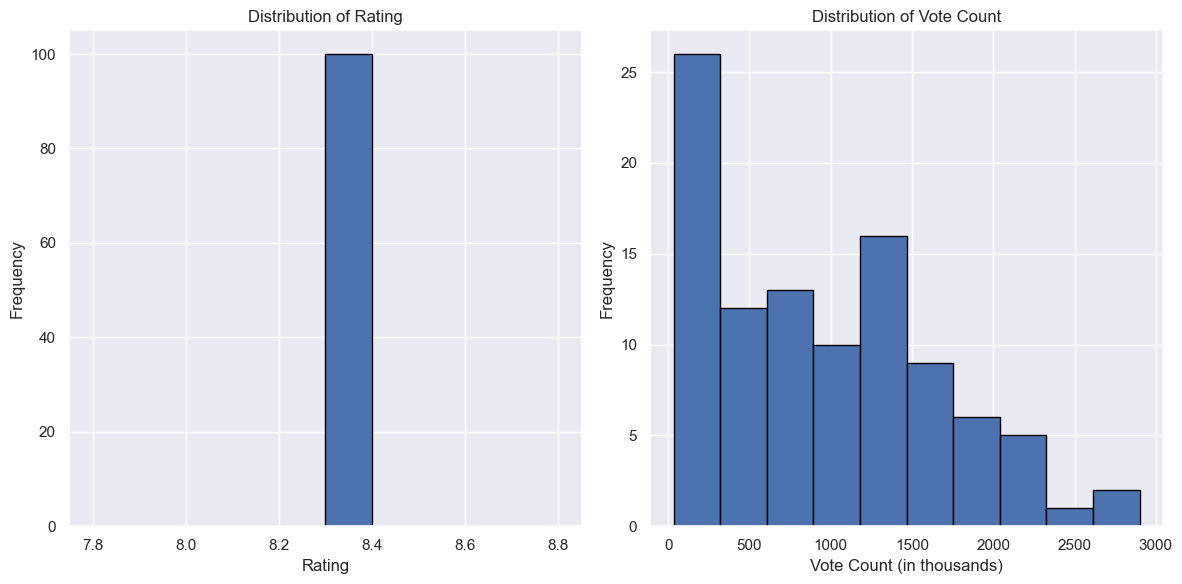

In [33]:
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))

# Distribution of rating
plt.subplot(1, 2, 1)
plt.hist(df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Distribution of vote_count
plt.subplot(1, 2, 2)
plt.hist(df['votes_count(K)'], bins=10, edgecolor='black')
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count (in thousands)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [34]:
len(df[df['rating'] == 8.3])

100

- We see that the top 100 IMDB film based on rating all have 8.3 rating 

In [35]:
film_with_highest_votes = df.loc[df['votes_count(K)'].idxmax(), 'title']
film_with_highest_votes

'The Shawshank Redemption'

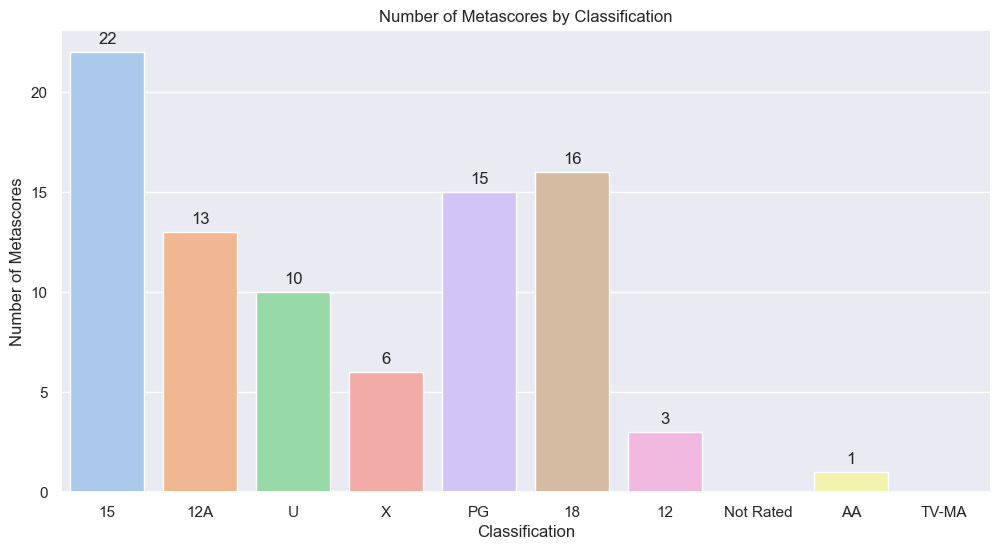

In [44]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='classification', y='metascore', data=df, palette='pastel', estimator=lambda x: len(x), errorbar=None, hue='classification', dodge=False, legend=False)

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')


plt.title('Number of Metascores by Classification')
plt.xlabel('Classification')
plt.ylabel('Number of Metascores')

plt.show()

- Movie for classification of 15

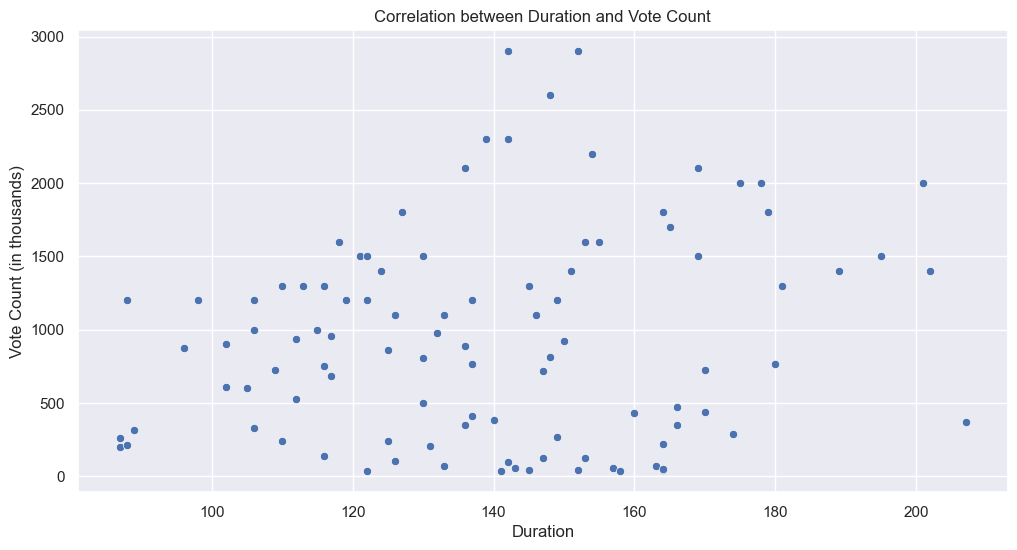

In [45]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='duration', y='votes_count(K)')
plt.title('Correlation between Duration and Vote Count')
plt.xlabel('Duration')
plt.ylabel('Vote Count (in thousands)')
plt.show()

- dont see strong correlation 

In [46]:
df.head()

,title,description,release_year,duration,classification,rating,metascore,votes_count(K)
0,The Shawshank Redemption,"Over the course of several years, two convicts...",1994,142,15,8.3,82.0,2900.0
1,The Godfather,"Don Vito Corleone, head of a mafia family, dec...",1972,175,15,8.3,100.0,2000.0
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008,152,12A,8.3,84.0,2900.0
3,Schindler's List,"In German-occupied Poland during World War II,...",1993,195,15,8.3,95.0,1500.0
4,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003,201,12A,8.3,94.0,2000.0


<b>Finally, I want to analyze "description" column to see the how we can marketing and include which word to make the post more easily to appear in IMDB page</b>

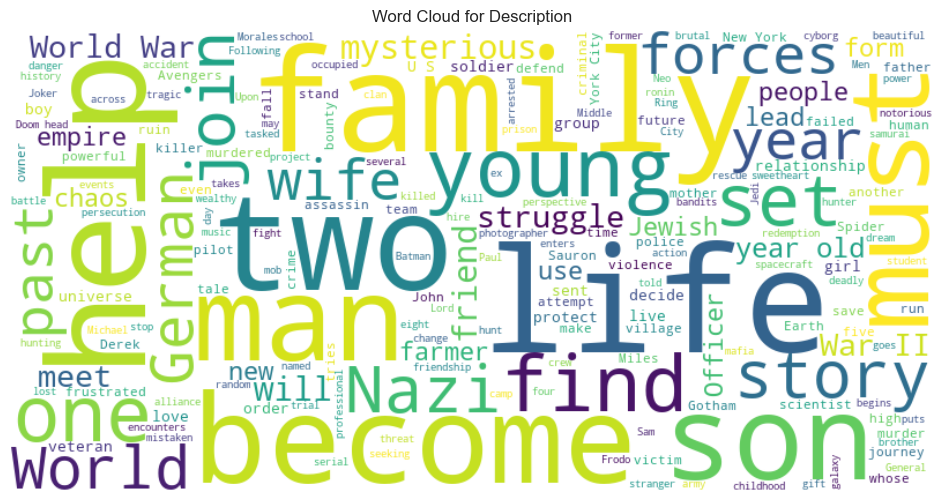

In [49]:
from wordcloud import WordCloud

# Combine all descriptions into a single string
text = ' '.join(df['description'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Description')
plt.show()